In [4]:
# Iris
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import datasets

In [5]:
data = datasets.load_wine()
x = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["target"])

# datasetsから得られるデータは目的変数とそれ以外の項目が分かれているので結合して分析してみる
all = pd.concat([x, y], axis=1, sort=False)
all

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
# クラス分類の特徴量となりうる項目を探してみる
all.groupby("target").mean().sort_values(by="color_intensity", ascending=True)
# 中央値 .median()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [121]:
!pip install seaborn

<Axes: xlabel='target', ylabel='proline'>

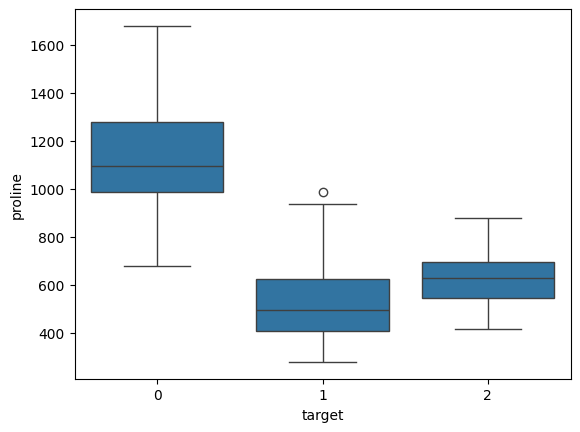

In [8]:
# クラスごとの被りをプロットして見ていく
import seaborn as sns 
sns.boxplot(x='target', y='proline', data=all)

<Axes: xlabel='target', ylabel='flavanoids'>

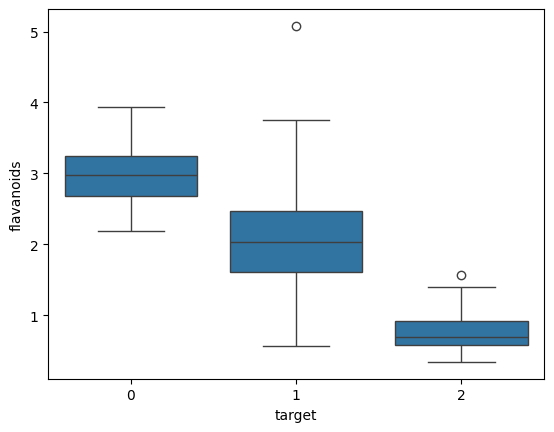

In [9]:
# flavanoids
# どのクラスも被りがなく、分類によさそうだ
sns.boxplot(x='target', y='flavanoids', data=all)

<Axes: xlabel='target', ylabel='color_intensity'>

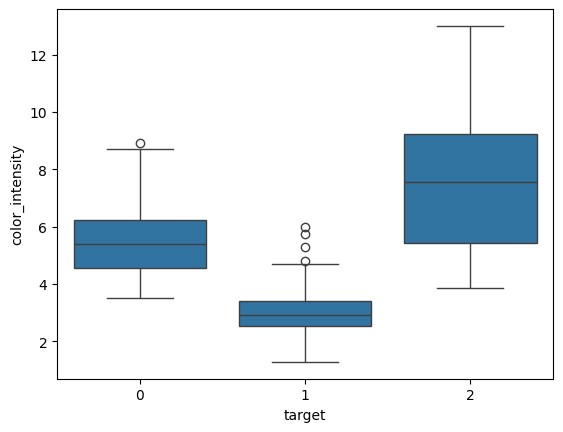

In [10]:
sns.boxplot(x='target', y='color_intensity', data=all)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

pipeline = Pipeline(steps=[
    ("standerd_scaler", StandardScaler()), 
    ("Classifier", HistGradientBoostingClassifier())
])
pipeline

Pipeline(steps=[('standerd_scaler', StandardScaler()),
                ('Classifier', HistGradientBoostingClassifier())])

In [14]:
pipeline.fit(x_train, y_train.values.ravel())

Pipeline(steps=[('standerd_scaler', StandardScaler()),
                ('Classifier', HistGradientBoostingClassifier())])

In [15]:
pipeline.predict(x_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [80]:
pipeline.score(x_train, y_train)

1.0

In [79]:
pipeline.score(x_test, y_test)

0.9722222222222222

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    pipe, 
    x_train, 
    y_train.values.ravel(), 
    cv=5,
    scoring='accuracy')
scores

array([1.        , 0.93103448, 0.92857143, 0.96428571, 0.96428571])

In [83]:
y_pred = pipeline.predict(x_test)
prob = pipeline.predict_proba(x_test)[:,1]
prob

array([5.10638228e-07, 2.20513740e-07, 7.50150511e-05, 1.08185896e-05,
       9.99989011e-01, 4.69523858e-07, 9.99999878e-01, 2.50911058e-08,
       9.99994868e-01, 7.27216652e-05, 2.84801396e-04, 5.86344891e-01,
       4.90616517e-05, 7.91743717e-01, 9.53373146e-08, 9.99999789e-01,
       9.99999981e-01, 9.99999972e-01, 2.88414954e-06, 9.99999959e-01,
       1.71095329e-06, 9.89744919e-01, 9.99870359e-01, 3.65659054e-07,
       3.02757298e-05, 2.57296314e-06, 9.99999976e-01, 6.31513607e-01,
       9.99999926e-01, 8.96371818e-07, 1.01371134e-06, 9.99999960e-01,
       1.22907491e-07, 2.33554071e-06, 3.31703057e-06, 3.68556122e-07])

In [91]:
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [16]:
# ランダムフォレストを利用するパターン
# ハイパーパラメータ調整も行う
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# GridSearchCV
# 交差検証とハイパーパラメータの調整を同時にできる。
# param_gridがハイパーパラメータ

In [24]:
param_grid = {
    "max_depth":[1,2,3], 
    "n_estimators":[100,200],
    "min_samples_split":[2,3],
}
 
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid,   
    scoring="accuracy",
    cv=2,
    verbose=3,
    n_jobs=1)
 
clf.fit(x_train, y_train.values.ravel())

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END max_depth=1, min_samples_split=2, n_estimators=100;, score=0.887 total time=   0.2s
[CV 2/2] END max_depth=1, min_samples_split=2, n_estimators=100;, score=0.930 total time=   0.2s
[CV 1/2] END max_depth=1, min_samples_split=2, n_estimators=200;, score=0.901 total time=   0.4s
[CV 2/2] END max_depth=1, min_samples_split=2, n_estimators=200;, score=0.930 total time=   0.4s
[CV 1/2] END max_depth=1, min_samples_split=3, n_estimators=100;, score=0.887 total time=   0.2s
[CV 2/2] END max_depth=1, min_samples_split=3, n_estimators=100;, score=0.930 total time=   0.2s
[CV 1/2] END max_depth=1, min_samples_split=3, n_estimators=200;, score=0.901 total time=   0.3s
[CV 2/2] END max_depth=1, min_samples_split=3, n_estimators=200;, score=0.930 total time=   0.3s
[CV 1/2] END max_depth=2, min_samples_split=2, n_estimators=100;, score=0.958 total time=   0.2s
[CV 2/2] END max_depth=2, min_samples_split=2, n_estimators=100;, 

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=3)

In [25]:
print("Best Model Parameter: ",clf.best_params_)

Best Model Parameter:  {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [26]:
from sklearn.metrics import classification_report

clf_best = clf.best_estimator_
y_true, y_pred = y_test, clf_best.predict(x_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

